<br>
<br>

### **1**) importiamo le librerie necessarie per eseguire il file

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import import_ipynb
from selected_indicator import select_indicators
from statistics import median

<br>
<br>
<br>
<br>
<br>

### **2**) import dataset

In [135]:
# gli indicatori li importiamo dal file select_indicator
select_indicators = select_indicators['mn']
print(select_indicators)

['MWB6A', 'MWB16', 'MMT9', 'MMT11', 'MCM3', 'MCM8', 'MVT9', 'MMA1', 'MAF10', 'MAF11', 'MSB2U', 'MLS2', 'MWB4', 'MAF6', 'MAF8', 'MAF9', 'MSB1', 'MWB18', 'MMT1', 'MMT5', 'MTA3']


In [136]:
data = pd.read_csv('../data/out/data.csv', index_col=0)

In [137]:
#data.replace([np.inf, -np.inf], np.nan, inplace=True)

#così puliamo il dataset da ogni Nan
#data.drop('DB2')
#data.dropna(inplace=True)
#print(data)

In [138]:
#data.to_csv(os.path.join('../data/out/out_processing/','prova_iniziale_data.csv'))

<br>
<br>
<br>
<br>
<br>

### **3**) sezione per descrizione preliminare dati

In [139]:
print("LUNGHEZZA TOTALE DATASE:",len(data))

LUNGHEZZA TOTALE DATASE: 6161


In [140]:
#stampiamo la shape del dataframe (quante righe e quante colonne)
print("(numero righe, numero colonne):", data.shape)

(numero righe, numero colonne): (6161, 21)


In [141]:
#stampiamo i primi valori per vedere una bozza del contenuto del df
data.head()

MWB4  MWB6A  MWB16  MWB18  MMT1  MMT5  MMT9  MMT11  MCM3  \
6_Congo_MICS6_1_6_1  21.0    3.0    1.0    1.0   0.0   3.0   0.0    0.0   NaN   
6_Congo_MICS6_1_6_2  21.0    3.0    1.0    1.0   1.0   3.0   0.0    0.0   NaN   
6_Congo_MICS6_1_6_3  21.0    3.0    1.0    1.0   0.0   3.0   0.0    0.0   NaN   
6_Congo_MICS6_1_6_4  24.0    3.0    1.0    1.0   0.0   3.0   NaN    0.0   NaN   
6_Congo_MICS6_1_6_5  37.0    3.0    1.0    1.0   3.0   NaN   1.0    0.0   NaN   

                     MCM8  ...  MMA1  MAF6  MAF8  MAF9  MAF10  MAF11  MSB1  \
6_Congo_MICS6_1_6_1   1.0  ...   9.0   1.0   1.0   1.0    1.0    1.0  19.0   
6_Congo_MICS6_1_6_2   1.0  ...   9.0   1.0   1.0   1.0    1.0    1.0  19.0   
6_Congo_MICS6_1_6_3   1.0  ...   9.0   1.0   1.0   1.0    2.0    1.0  18.0   
6_Congo_MICS6_1_6_4   1.0  ...   9.0   1.0   1.0   1.0    1.0    1.0  20.0   
6_Congo_MICS6_1_6_5   1.0  ...   9.0   1.0   2.0   1.0    1.0    1.0  20.0   

                     MSB2U  MTA3  MLS2  
6_Congo_MICS6_1_6_1    4.0   NaN   9.0  
6_Congo_MICS6_1_6_2    3.0   NaN   9.0  
6_Congo_MICS6_1_6_3    1.0   2.0   6.0  
6_Congo_MICS6_1_6_4    4.0   NaN   5.0  
6_Congo_MICS6_1_6_5    2.0   NaN   4.0  

[5 rows x 21 columns]

In [142]:
# Qui il nostro obiettivo è comprendere la numerosità di ogni item in modo, una volta individuati gli item meno numerosi,
# eliminarli in modo da avere un dataset popoloso. Prima di iniziare il processing dei dati è infatti importante comprendere
# quanti e quali siano i dati. Se il dataset è praticamente inesistente per un item allora eliminiamo l'item prima di importare il
# il dadaset per l'analisi
for item, values in data.items():
    print("numerosità:", item, "=", data[item].notnull().sum())

numerosità: MWB4 = 6113
numerosità: MWB6A = 5727
numerosità: MWB16 = 1867
numerosità: MWB18 = 6113
numerosità: MMT1 = 6113
numerosità: MMT5 = 683
numerosità: MMT9 = 5870
numerosità: MMT11 = 6113
numerosità: MCM3 = 2934
numerosità: MCM8 = 6113
numerosità: MVT9 = 6113
numerosità: MMA1 = 6106
numerosità: MAF6 = 5191
numerosità: MAF8 = 5191
numerosità: MAF9 = 5191
numerosità: MAF10 = 5191
numerosità: MAF11 = 5191
numerosità: MSB1 = 6113
numerosità: MSB2U = 5151
numerosità: MTA3 = 1621
numerosità: MLS2 = 6113


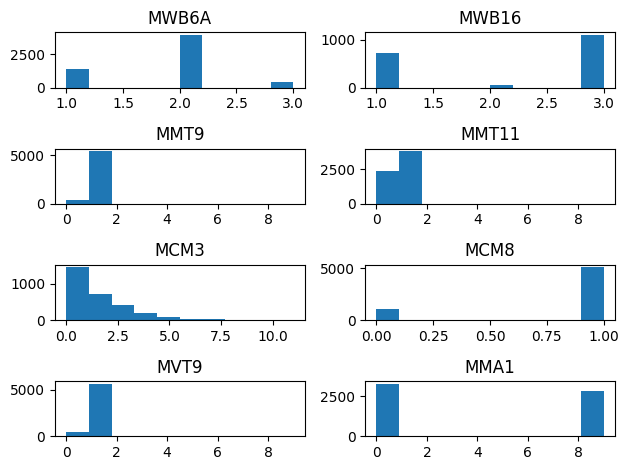

In [143]:
# Visualizzare velocemente la distribuzione dei diversi item
f,a = plt.subplots(4,2)
a = a.ravel()

for idx,ax in enumerate(a):
    ax.hist(data[select_indicators[idx]])
    ax.set_title(select_indicators[idx])
plt.tight_layout()

In [144]:
#da eliminare in questae posizione questa istruzione
#data.to_csv(os.path.join('../data/out/out_processing/','prova_iniziale_data.csv'))

<br>
<br>
<br>

In [145]:
# Eliminiamo le colonne che riteniamo essere troppo poco numerose/item che decidiamo non essere per come si presentano nel dataset
# funzionali ad analisi successive.
data.drop('MMT5', inplace=True, axis=1)
data.drop('MTA3', inplace=True, axis=1)
data.drop('MCM3', inplace=True, axis=1)
data.drop('MWB16', inplace=True, axis=1)
data.dropna(inplace=True)

<br>
<br>
<br>
<br>
<br>
<br>

### **4**) Creiamo a partire dagli item le variabili definitive da fornire al modello

Questa sezione, come altre in questo documento, è specifica per il tipo di dataset utilizzato.


- MWB4 = [0,1,2...n]
- MWB6A = [0,1,2,3,9]
- MWB18 = [0,1,9]
- MMT1 = [0,1,2,3,9]
- MMT9 = [0,1,9]
- MMT11 = [0,1,9]
- MCM8 = [0,1]
- MVT9 = [0,1,9]
- MMA1 = [0,1,9] (presenta tutti valori 0 quindi non lo usiamo)
- MAF6 = [1,2,3,4,9]
- MAF8 = [1,2,3,4,9]
- MAF9 = [1,2,3,4,9]
- MAF10 = [1,2,3,4,9]
- MAF11 = [1,2,3,4,9]
- MSB1 = [0,1,2...49,95,99]
- MSB2U = [1,2,3,4,9]
- MLS2 = [0,1,2...10,99]

<br>

## MWB4

<Axes: >

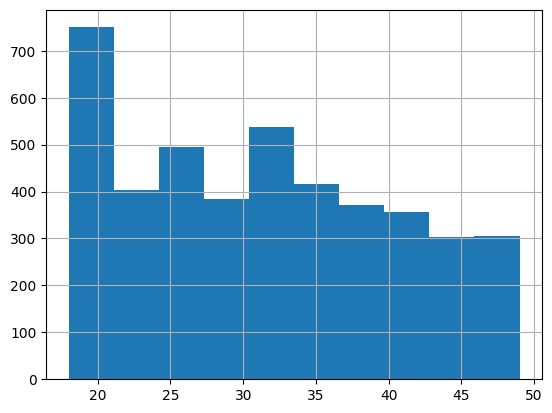

In [146]:
# osserviamo com'è il dato originale
data['MWB4'].head()
data['MWB4'].hist()
#data['MWB4'].count()

<br>

In [147]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MWB4'] = data['MWB4'].astype("Int64")
data['MWB4'].head()

6_Congo_MICS6_1_6_1    21
6_Congo_MICS6_1_6_2    21
6_Congo_MICS6_1_6_3    21
6_Congo_MICS6_1_6_5    37
6_Congo_MICS6_1_9_1    45
Name: MWB4, dtype: Int64

<br>

## MWB6A

<Axes: >

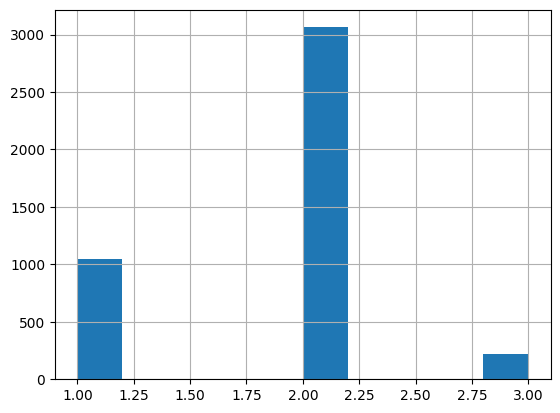

In [148]:
# osserviamo com'è il dato originale
data['MWB6A'].head()
data['MWB6A'].hist()
#data['MWB4'].count()

In [149]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MWB6A'] = data['MWB6A'].astype("Int64")
data['MWB6A'].head()

6_Congo_MICS6_1_6_1    3
6_Congo_MICS6_1_6_2    3
6_Congo_MICS6_1_6_3    3
6_Congo_MICS6_1_6_5    3
6_Congo_MICS6_1_9_1    2
Name: MWB6A, dtype: Int64

<br>

<br>

## MWB18

<Axes: >

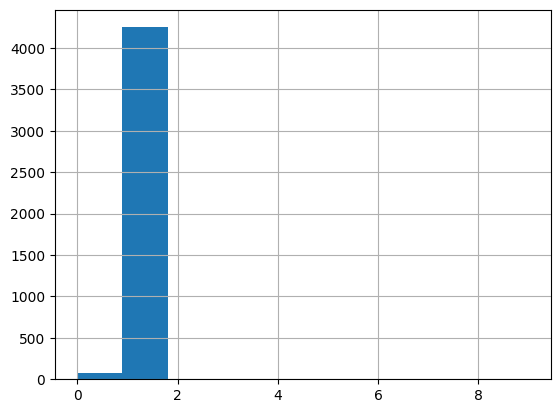

In [150]:
# osserviamo com'è il dato originale
data['MWB18'].head()
data['MWB18'].hist()
#data['MWB4'].count()

In [151]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MWB18'] = data['MWB18'].astype("Int64")
data['MWB18'].head()
MWB18 = []
for response in data['MWB18']:
    if response != 0 and response != 1:
        data.drop(data.loc[data['MWB18']==response].index, inplace=True)
    else:
        MWB18.append(response)

data['MWB18'] = MWB18

<br>
<br>
<br>

## MMT1

<Axes: >

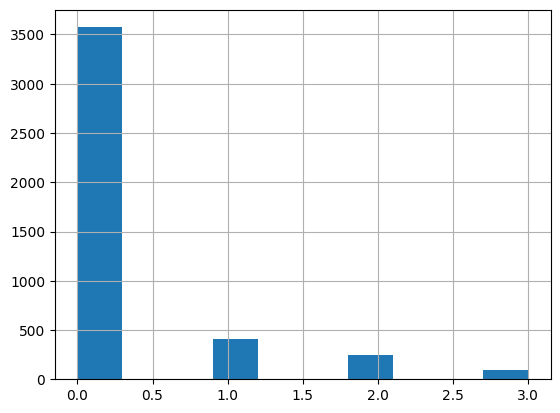

In [152]:
# osserviamo com'è il dato originale
data['MMT1'].head()
data['MMT1'].hist()
#data['MWB4'].count()

In [153]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MMT1'] = data['MMT1'].astype("Int64")
data['MMT1'].head()

6_Congo_MICS6_1_6_1    0
6_Congo_MICS6_1_6_2    1
6_Congo_MICS6_1_6_3    0
6_Congo_MICS6_1_6_5    3
6_Congo_MICS6_1_9_1    0
Name: MMT1, dtype: Int64

<br>
<br>
<br>

## MMT9

<Axes: >

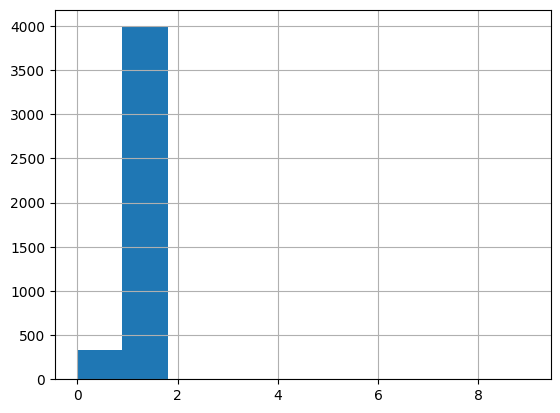

In [154]:
# osserviamo com'è il dato originale
data['MMT9'].head()
data['MMT9'].hist()
#data['MWB4'].count()

In [155]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MMT9'] = data['MMT9'].astype("Int64")
data['MMT9'].head()

6_Congo_MICS6_1_6_1    0
6_Congo_MICS6_1_6_2    0
6_Congo_MICS6_1_6_3    0
6_Congo_MICS6_1_6_5    1
6_Congo_MICS6_1_9_1    1
Name: MMT9, dtype: Int64

In [156]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MMT9'] = data['MMT9'].astype("Int64")
data['MMT9'].head()
MMT9 = []
for response in data['MMT9']:
    if response != 0 and response != 1:
        data.drop(data.loc[data['MMT9']==response].index, inplace=True)
    else:
        MMT9.append(response)

data['MMT9'] = MMT9

<br>
<br>
<br>

## MMT11

<Axes: >

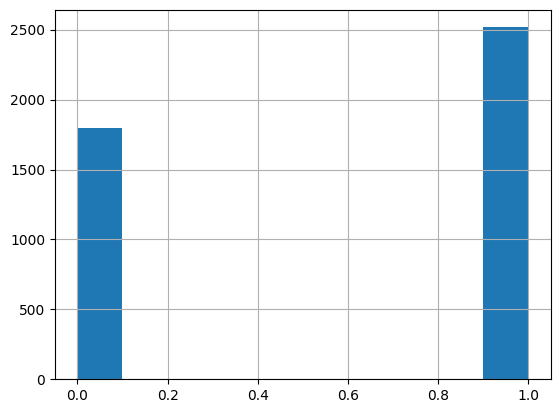

In [157]:
# osserviamo com'è il dato originale
data['MMT11'].head()
data['MMT11'].hist()
#data['MMT11'].count()

In [158]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MMT11'] = data['MMT11'].astype("Int64")
data['MMT11'].head()

6_Congo_MICS6_1_6_1    0
6_Congo_MICS6_1_6_2    0
6_Congo_MICS6_1_6_3    0
6_Congo_MICS6_1_6_5    0
6_Congo_MICS6_1_9_1    0
Name: MMT11, dtype: Int64

<br>
<br>
<br>

## MCM8

<Axes: >

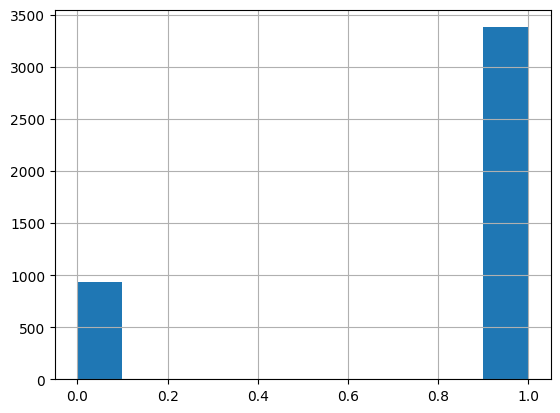

In [159]:
# osserviamo com'è il dato originale
data['MCM8'].head()
data['MCM8'].hist()
#data['MMT11'].count()

In [160]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MCM8'] = data['MCM8'].astype("Int64")
data['MCM8'].head()

6_Congo_MICS6_1_6_1    1
6_Congo_MICS6_1_6_2    1
6_Congo_MICS6_1_6_3    1
6_Congo_MICS6_1_6_5    1
6_Congo_MICS6_1_9_1    1
Name: MCM8, dtype: Int64

<br>
<br>
<br>

## MVT9

<Axes: >

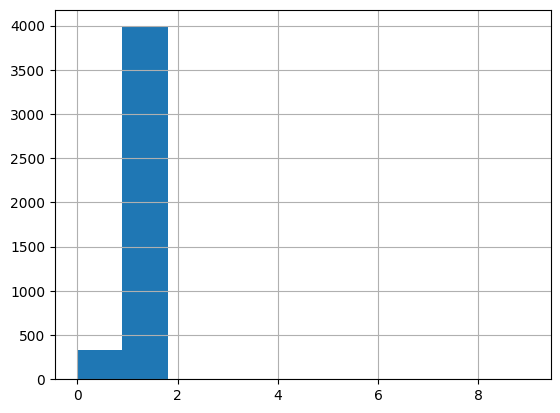

In [161]:
# osserviamo com'è il dato originale
data['MVT9'].head()
data['MVT9'].hist()
#data['MMT11'].count()

In [162]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MVT9'] = data['MVT9'].astype("Int64")
data['MVT9'].head()
MVT9 = []
for response in data['MVT9']:
    if response != 0 and response != 1:
        data.drop(data.loc[data['MVT9']==response].index, inplace=True)
    else:
        MVT9.append(response)

data['MVT9'] = MVT9

<br>
<br>
<br>

## MMA1

<Axes: >

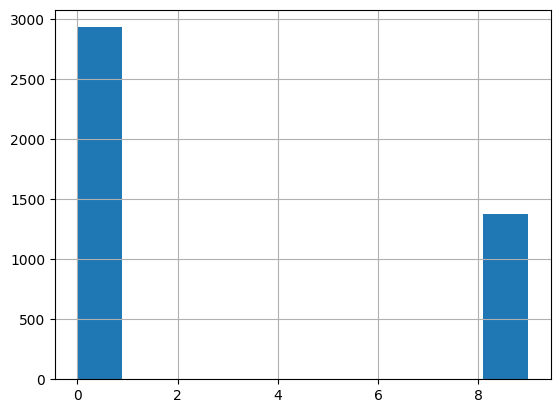

In [163]:
# osserviamo com'è il dato originale
data['MMA1'].head()
data['MMA1'].hist()
#data['MMT11'].count()

In [164]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MMA1'] = data['MMA1'].astype("Int64")
data['MMA1'].head()

6_Congo_MICS6_1_6_1    9
6_Congo_MICS6_1_6_2    9
6_Congo_MICS6_1_6_3    9
6_Congo_MICS6_1_6_5    9
6_Congo_MICS6_1_9_1    0
Name: MMA1, dtype: Int64

In [165]:
data.drop('MMA1', inplace=True, axis=1)

<br>
<br>
<br>

## MAF6

<Axes: >

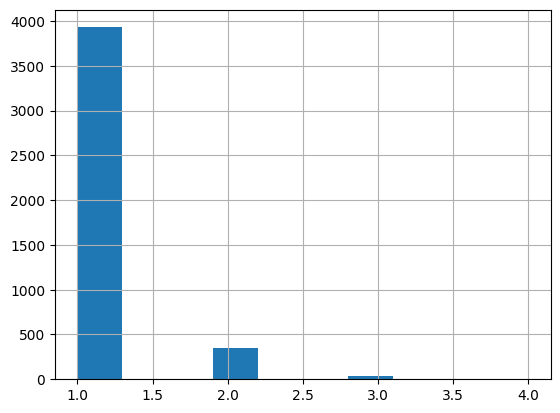

In [166]:
# osserviamo com'è il dato originale
data['MAF6'].head()
data['MAF6'].hist()
#data['MMT11'].count()

In [167]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MAF6'] = data['MAF6'].astype("Int64")
data['MAF6'].head()

6_Congo_MICS6_1_6_1    1
6_Congo_MICS6_1_6_2    1
6_Congo_MICS6_1_6_3    1
6_Congo_MICS6_1_6_5    1
6_Congo_MICS6_1_9_1    1
Name: MAF6, dtype: Int64

<br>
<br>
<br>

## MAF8

<Axes: >

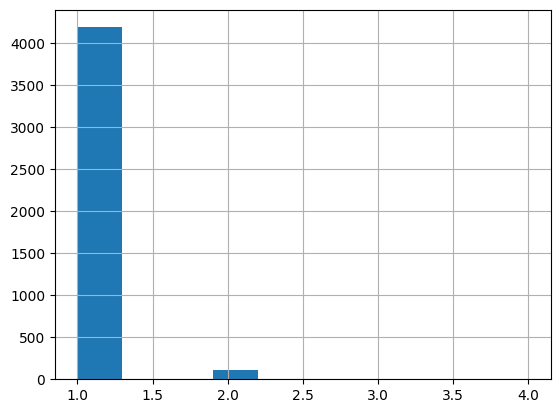

In [168]:
# osserviamo com'è il dato originale
data['MAF8'].head()
data['MAF8'].hist()
#data['MMT11'].count()

In [169]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MAF8'] = data['MAF8'].astype("Int64")
data['MAF8'].head()

6_Congo_MICS6_1_6_1    1
6_Congo_MICS6_1_6_2    1
6_Congo_MICS6_1_6_3    1
6_Congo_MICS6_1_6_5    2
6_Congo_MICS6_1_9_1    1
Name: MAF8, dtype: Int64

<br>
<br>
<br>

## MAF9

<Axes: >

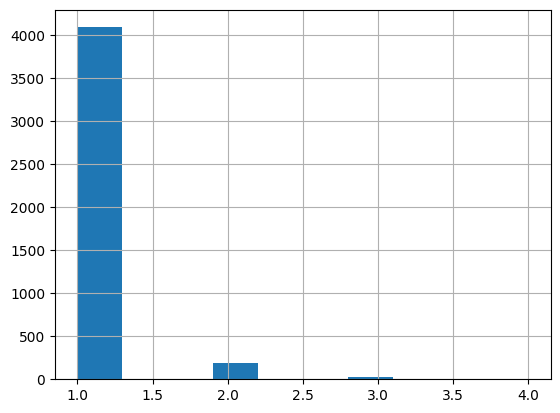

In [170]:
# osserviamo com'è il dato originale
data['MAF9'].head()
data['MAF9'].hist()
#data['MMT11'].count()

In [171]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MAF9'] = data['MAF9'].astype("Int64")
data['MAF9'].head()

6_Congo_MICS6_1_6_1    1
6_Congo_MICS6_1_6_2    1
6_Congo_MICS6_1_6_3    1
6_Congo_MICS6_1_6_5    1
6_Congo_MICS6_1_9_1    1
Name: MAF9, dtype: Int64

<br>
<br>
<br>

## MAF10

<Axes: >

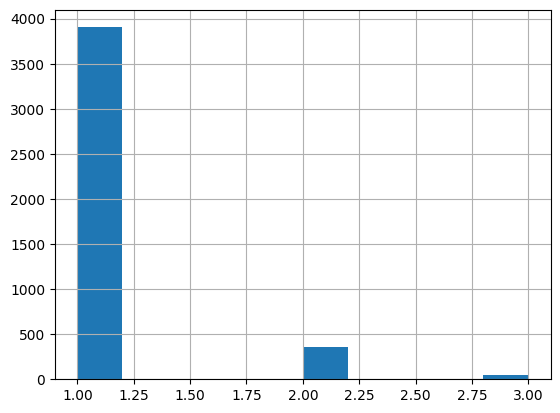

In [172]:
# osserviamo com'è il dato originale
data['MAF10'].head()
data['MAF10'].hist()
#data['MMT11'].count()

In [173]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MAF10'] = data['MAF10'].astype("Int64")
data['MAF10'].head()

6_Congo_MICS6_1_6_1    1
6_Congo_MICS6_1_6_2    1
6_Congo_MICS6_1_6_3    2
6_Congo_MICS6_1_6_5    1
6_Congo_MICS6_1_9_1    2
Name: MAF10, dtype: Int64

<br>
<br>
<br>

## MAF11

<Axes: >

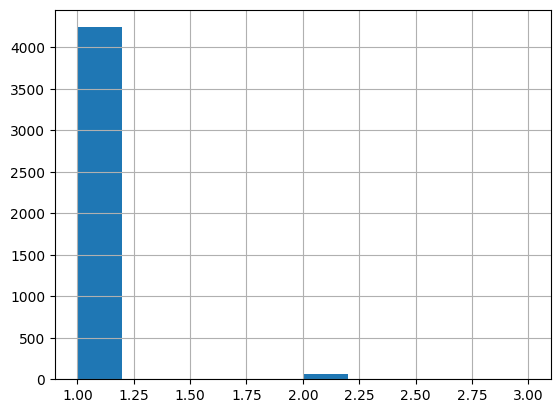

In [174]:
# osserviamo com'è il dato originale
data['MAF11'].head()
data['MAF11'].hist()
#data['MMT11'].count()

In [175]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MAF11'] = data['MAF11'].astype("Int64")
data['MAF11'].head()

6_Congo_MICS6_1_6_1    1
6_Congo_MICS6_1_6_2    1
6_Congo_MICS6_1_6_3    1
6_Congo_MICS6_1_6_5    1
6_Congo_MICS6_1_9_1    1
Name: MAF11, dtype: Int64

<br>
<br>
<br>

## MSB1

<Axes: >

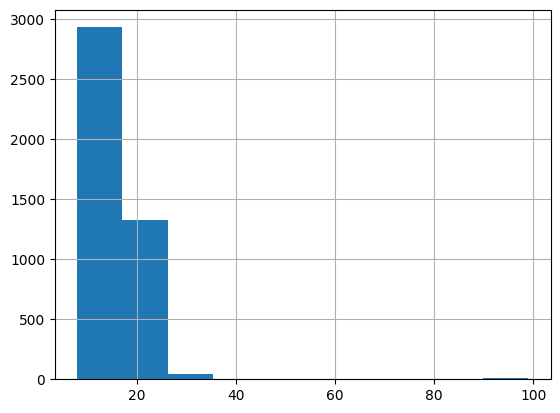

In [176]:
# osserviamo com'è il dato originale
data['MSB1'].head()
data['MSB1'].hist()
#data['MMT11'].count()

In [177]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MSB1'] = data['MSB1'].astype("Int64")
data['MSB1'].head()

6_Congo_MICS6_1_6_1    19
6_Congo_MICS6_1_6_2    19
6_Congo_MICS6_1_6_3    18
6_Congo_MICS6_1_6_5    20
6_Congo_MICS6_1_9_1    15
Name: MSB1, dtype: Int64

In [178]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MSB1'] = data['MSB1'].astype("Int64")
data['MSB1'].head()
MSB1 = []
for response in data['MSB1']:
    if response == 95 or response == 99:
        data.drop(data.loc[data['MSB1']==response].index, inplace=True)
    else:
        MSB1.append(response)

data['MSB1'] = MSB1

<br>
<br>
<br>

## MSB2U

<Axes: >

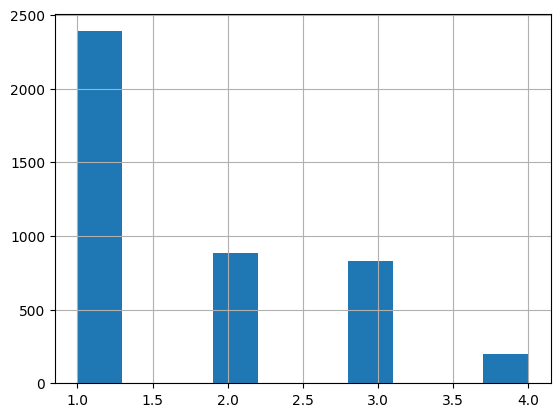

In [179]:
# osserviamo com'è il dato originale
data['MSB2U'].head()
data['MSB2U'].hist()
#data['MMT11'].count()

In [180]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MSB2U'] = data['MSB2U'].astype("Int64")
data['MSB2U'].head()

6_Congo_MICS6_1_6_1    4
6_Congo_MICS6_1_6_2    3
6_Congo_MICS6_1_6_3    1
6_Congo_MICS6_1_6_5    2
6_Congo_MICS6_1_9_1    1
Name: MSB2U, dtype: Int64

<br>
<br>
<br>

## MLS2

<Axes: >

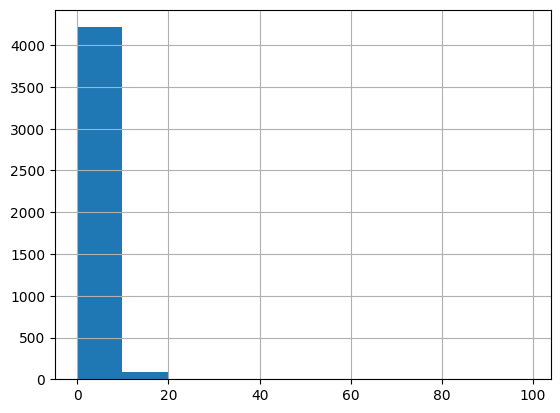

In [181]:
# osserviamo com'è il dato originale
data['MLS2'].head()
data['MLS2'].hist()
#data['MMT11'].count()

In [182]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
data['MLS2'] = data['MLS2'].astype("Int64")
data['MLS2'].head()

6_Congo_MICS6_1_6_1    9
6_Congo_MICS6_1_6_2    9
6_Congo_MICS6_1_6_3    6
6_Congo_MICS6_1_6_5    4
6_Congo_MICS6_1_9_1    6
Name: MLS2, dtype: Int64

In [183]:
# manipoliamo l'item fino ad ottenere il dato come desiderato e visualizziamolo
MLS2 = []
for response in data['MLS2']:
    if response == 99:
        data.drop(data.loc[data['MLS2']==response].index, inplace=True)
    else:
        MLS2.append(response)

data['MLS2'] = MLS2

In [184]:
# modo alternativo di eliminare dati maggiori di 10
for response in data['MLS2']:
    if response > 10:
        data.drop(data.loc[data['MLS2']==response].index, inplace=True)

In [185]:
mediana = median(data['MLS2'])
print(mediana)

5.0


In [186]:
MLS2 = []
for response in data['MLS2']:
    if response <= 5:
        MLS2.append(0)
    else:
        MLS2.append(1)

data['MLS2'] = MLS2

<Axes: >

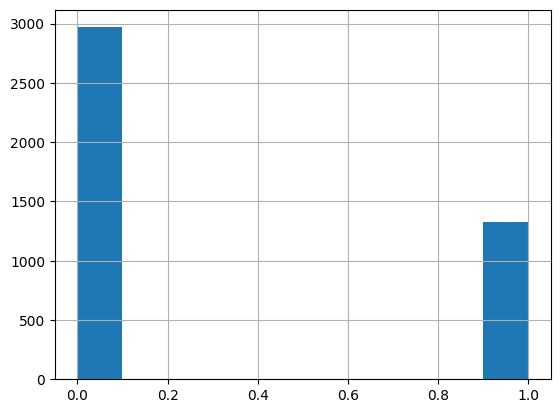

In [187]:
data['MLS2'].hist()

In [188]:
data.to_csv(os.path.join('../data/out/out_processing/','data.csv'))

In [189]:
len(data)

4298